In [1]:
import os 
from cv2 import imread, normalize, resize
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import csv

In [2]:
case_list = ['Case_1', 'Case_2','Case_3','Case_4']
Y_image = []
X_image = []

for case in case_list:
    path = 'C:/Users/user/Desktop/sem/simulation_data/SEM/' +  case # 폴더 경로
    folder_list = ['/80','/81','/82','/83','/84']


    for folder_name in folder_list:
        temp_path = path + folder_name
        os.chdir(temp_path) # 해당 폴더로 이동
        files = os.listdir(temp_path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
        
        for file in files:
            if 'itr0' in file:
                f = imread(file, cv2.IMREAD_GRAYSCALE)
                image = f / 255
                X_image.append(image)
    
    path = 'C:/Users/user/Desktop/sem/simulation_data/Depth/' +  case # 폴더 경로
    for folder_name in folder_list:
        temp_path = path + folder_name
        os.chdir(temp_path) # 해당 폴더로 이동
        files = os.listdir(temp_path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
        
        for file in files:
            f = imread(file, cv2.IMREAD_GRAYSCALE)
            image = f / 255
            Y_image.append(image)

In [3]:
for case in case_list:
    path = 'C:/Users/user/Desktop/sem/simulation_data/SEM/' +  case # 폴더 경로
    folder_list = ['/80','/81','/82','/83','/84']


    for folder_name in folder_list:
        temp_path = path + folder_name
        os.chdir(temp_path) # 해당 폴더로 이동
        files = os.listdir(temp_path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
        
        for file in files:
            if 'itr1' in file:
                f = imread(file, cv2.IMREAD_GRAYSCALE)
                image = f / 255
                X_image.append(image)
    
    path = 'C:/Users/user/Desktop/sem/simulation_data/Depth/' +  case # 폴더 경로
    for folder_name in folder_list:
        temp_path = path + folder_name
        os.chdir(temp_path) # 해당 폴더로 이동
        files = os.listdir(temp_path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
        
        for file in files:
            f = imread(file, cv2.IMREAD_GRAYSCALE)
            image = f / 255
            Y_image.append(image)

In [4]:
'''
file_name_list = []
depth_avg_list = []

with open('C:/Users/user/Desktop/sem/train/average_depth.csv', 'r') as file:
    file_read = csv.reader(file)
    for line in file:
        new_line = line.replace("\n", "")
        new_line2 = new_line.split(',')
        file_name_list.append(new_line2[0])	
        depth_avg_list.append(new_line2[1])
        
del file_name_list[0]
del depth_avg_list[0]

depth_list = ['Depth_110', 'Depth_120','Depth_130','Depth_140']

for depht in depth_list:
    path = 'C:/Users/user/Desktop/sem/train/SEM/' +  depht # 폴더 경로
    folder_list = os.listdir(path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음


    for folder_name in folder_list:
        temp_path = path + '/' + folder_name
        os.chdir(temp_path) # 해당 폴더로 이동
        files = os.listdir(temp_path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
        
        temp_y_name = depht.lower() + '_' + folder_name
        
        for file in files:
            f = imread(file, cv2.IMREAD_GRAYSCALE)
            image = f / 255
            X_image.append(image)
            
            avg_depth = float(depth_avg_list[int(file_name_list.index(temp_y_name))])
            Y_image_temp = np.ones(shape=(f.shape[0],f.shape[1]), dtype=np.float64)
            Y_image.append(Y_image_temp * (avg_depth / 255))
'''
        

In [5]:
X_image = np.expand_dims(X_image, axis=-1)
X_image.shape

(233968, 72, 48, 1)

In [6]:
Y_image = np.expand_dims(Y_image, axis=-1)
Y_image.shape

(233968, 72, 48, 1)

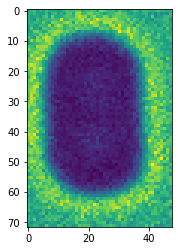

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_image[2])
plt.show()

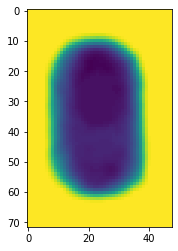

In [8]:
plt.imshow(Y_image[2])
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

x_train1, x_test, y_train1, y_test = train_test_split(X_image, Y_image, test_size= 0.2)

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size= 0.25)

In [11]:
x_train = np.array(x_train,dtype=np.float64)
y_train = np.array(y_train,dtype=np.float64)

x_val = np.array(x_val,dtype=np.float64)
y_val = np.array(y_val,dtype=np.float64)

x_test = np.array(x_test,dtype=np.float64)
y_test = np.array(y_test,dtype=np.float64)

path = 'C:/Users/user/Desktop/sem'
os.chdir(path)

checkpoint_path = "C:/Users/user/Desktop/sem/weight/simple_ae/cp-{epoch:02d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only = True, save_freq='epoch',  monitor='val_loss', verbose=1, mode="min")

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                              patience=9)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, verbose=1, mode="min",
                              patience=7, min_lr=0.00001)

In [12]:
'''
from tensorflow.keras import backend as K

def my_mse(y_true, y_pred):
    #difference between true label and predicted label
    
    if float(y_true[0][0][0]) <= 1:
        mean_sqr_error = K.mean(K.square(y_pred - y_true))
        
    else:
        y_pred_avg= K.mean(y_pred) 
        y_true_avg = float(y_true[0][0][0]) / 255
        mean_sqr_error = K.square(y_true_avg-y_pred_avg)
        
    return mean_sqr_error

'''

'\nfrom tensorflow.keras import backend as K\n\ndef my_mse(y_true, y_pred):\n    #difference between true label and predicted label\n    \n    if float(y_true[0][0][0]) <= 1:\n        mean_sqr_error = K.mean(K.square(y_pred - y_true))\n        \n    else:\n        y_pred_avg= K.mean(y_pred) \n        y_true_avg = float(y_true[0][0][0]) / 255\n        mean_sqr_error = K.square(y_true_avg-y_pred_avg)\n        \n    return mean_sqr_error\n\n'

In [13]:
stacked_encoder = models.Sequential([
    layers.Flatten(input_shape = [f.shape[0], f.shape[1], 1]),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(16, activation=None),
])

stacked_decoder = models.Sequential([
    layers.Dense(32, activation='relu', input_shape = [16]),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(f.shape[0] * f.shape[1] , activation=None),
    layers.Reshape([f.shape[0], f.shape[1], 1])
])

stacked_ae = models.Sequential([stacked_encoder,stacked_decoder])
stacked_ae.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1 * 1e-4))
history = stacked_ae.fit(x_train, y_train, 
                         validation_data=(x_val, y_val),
                         epochs=50, batch_size = 128,
                         callbacks= [ earlystopping, reduce_lr, cp_callback])

Epoch 1/40
1097/1097 [==============================] - 35s 29ms/step - loss: 0.0596 - val_loss: 0.0013

Epoch 00001: saving model to C:/Users/user/Desktop/sem/weight/simple_ae\cp-01.ckpt
Epoch 2/40
1097/1097 [==============================] - 17s 15ms/step - loss: 8.8913e-04 - val_loss: 7.9548e-04

Epoch 00002: saving model to C:/Users/user/Desktop/sem/weight/simple_ae\cp-02.ckpt
Epoch 3/40
1097/1097 [==============================] - 16s 15ms/step - loss: 7.4972e-04 - val_loss: 6.6348e-04

Epoch 00003: saving model to C:/Users/user/Desktop/sem/weight/simple_ae\cp-03.ckpt
Epoch 4/40
1097/1097 [==============================] - 17s 15ms/step - loss: 6.8693e-04 - val_loss: 6.0912e-04

Epoch 00004: saving model to C:/Users/user/Desktop/sem/weight/simple_ae\cp-04.ckpt
Epoch 5/40
1097/1097 [==============================] - 16s 15ms/step - loss: 6.3830e-04 - val_loss: 5.7684e-04

Epoch 00005: saving model to C:/Users/user/Desktop/sem/weight/simple_ae\cp-05.ckpt
Epoch 6/40
1097/1097 [======

In [14]:
def plot_model__hist(hist):
    plt.figure(figsize=(6,6))
    #plt.style.use("ggplot")
    plt.plot(hist.history['loss'], color='b', label="Training loss")
    plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
    plt.legend()
    plt.show()

In [15]:
stacked_ae = models.Sequential([stacked_encoder,stacked_decoder])
val_loss_history = history.history["val_loss"]
max_point = val_loss_history.index(min(val_loss_history))


stacked_ae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1 * 1e-4),
        loss='MSE',
        metrics=['mse'])

if max_point > 8:
    stacked_ae.load_weights(
        "C:/Users/user/Desktop/sem/weight/simple_ae/cp-" + str(max_point+1) + ".ckpt"
    )
else:
    stacked_ae.load_weights(
        "C:/Users/user/Desktop/sem/weight/simple_ae/cp-0" + str(max_point+1) + ".ckpt"
    )

1463/1463 [==============================] - 6s 4ms/step - loss: 3.0281e-04 - mse: 3.0281e-04


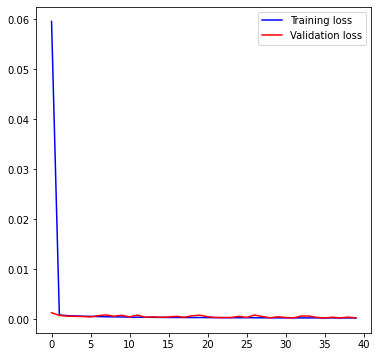

In [16]:
score = stacked_ae.evaluate(x_val, y_val)

plot_model__hist(history)

In [17]:
decoded_images = stacked_ae.predict(x_test)

In [18]:
distance_gap = decoded_images*255 - y_test*255
distance_gap_new = distance_gap.reshape(y_test.shape[0],-1)

avg_depth = np.mean(distance_gap_new,axis=1)

In [19]:
np.mean(avg_depth)

0.12360445739408277

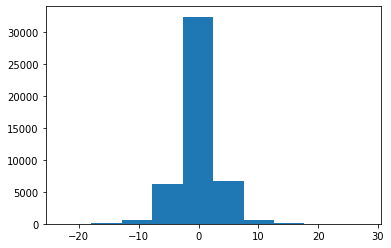

In [20]:
plt.hist(avg_depth)

plt.show()

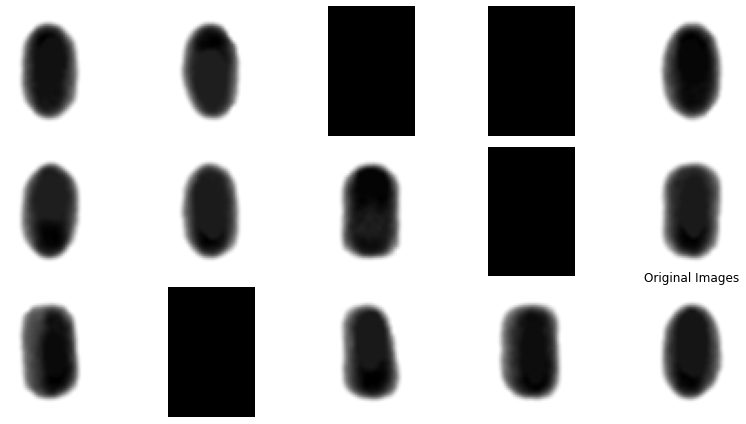

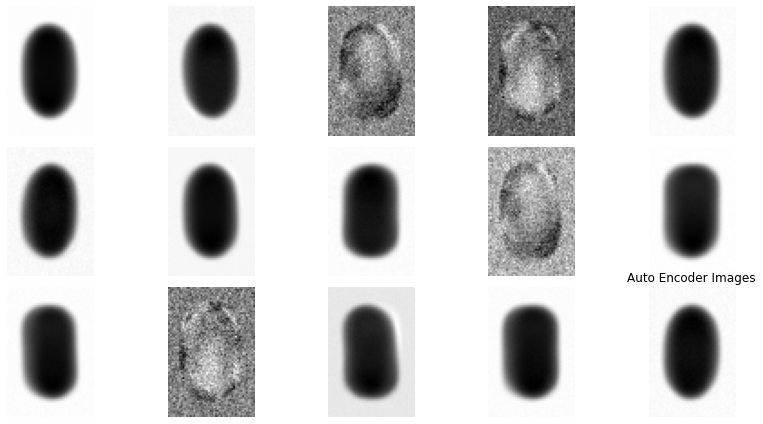

In [21]:
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 6)
for i in range(15):
    axes[i//5, i%5].imshow(y_test[i]*255, cmap='gray')
    axes[i//5, i%5].axis('off')
plt.tight_layout()
plt.title('Original Images')
plt.show()

fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 6)
for i in range(15):
    axes[i//5, i%5].imshow(decoded_images[i]*255, cmap='gray')
    axes[i//5, i%5].axis('off')
plt.tight_layout()
plt.title('Auto Encoder Images')
plt.show()

In [22]:
path = 'C:/Users/user/Desktop/sem/test/SEM' # 폴더 경로

test_image = []


os.chdir(path) # 해당 폴더로 이동
files = os.listdir(path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
    
for file in files:
    f = imread(file, cv2.IMREAD_GRAYSCALE)
    image = f / 255
    test_image.append(image)

In [23]:
decoded_images = stacked_ae.predict(np.array(test_image, dtype=np.float64))

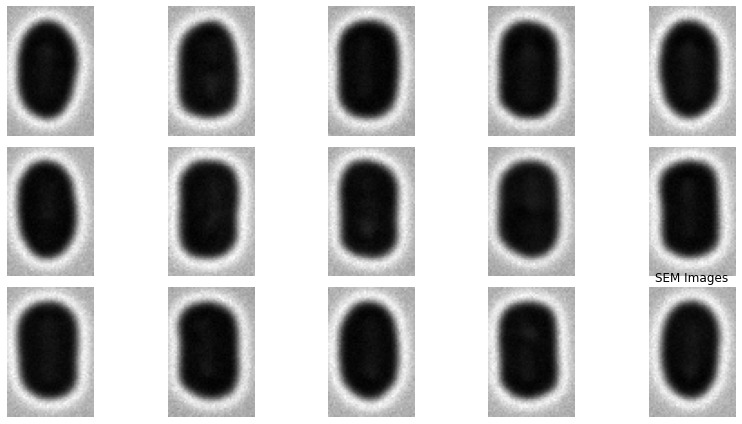

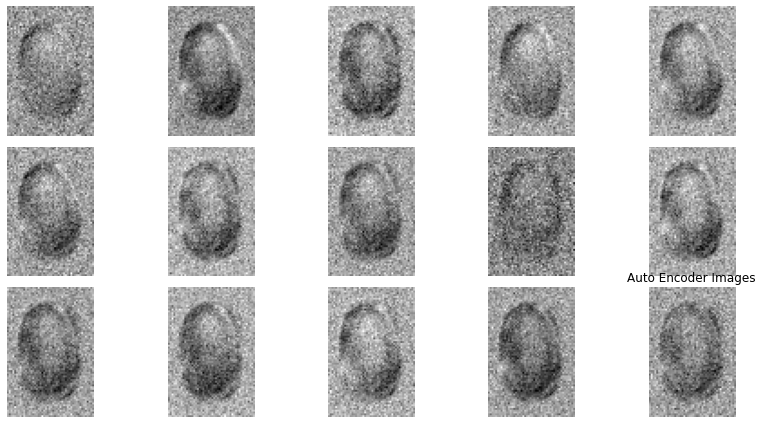

In [24]:
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 6)
for i in range(15):
    axes[i//5, i%5].imshow(test_image[i]*255, cmap='gray')
    axes[i//5, i%5].axis('off')
plt.tight_layout()
plt.title('SEM Images')
plt.show()

fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 6)
for i in range(15):
    axes[i//5, i%5].imshow(decoded_images[i]*255, cmap='gray')
    axes[i//5, i%5].axis('off')
plt.tight_layout()
plt.title('Auto Encoder Images')
plt.show()

In [25]:
import zipfile
def inference(decoded_images, files):
        
    os.makedirs('../../submission', exist_ok=True)
    os.chdir("../../submission")
    sub_imgs = []
    
    for path, pred_img in zip(files, decoded_images):
        cv2.imwrite(path, pred_img*255)
        sub_imgs.append(path)
        
    submission = zipfile.ZipFile("../submission.zip", 'w')
    for path in sub_imgs:
        submission.write(path)
    submission.close()
    
inference(decoded_images, files)

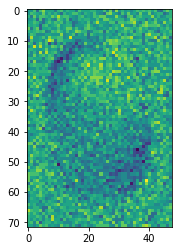

In [26]:
grayImg = cv2.imread('C:/Users/user/Desktop/sem/submission/000000.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(grayImg)
plt.show()

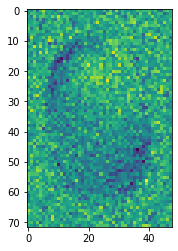

In [27]:
plt.imshow(decoded_images[0])
plt.show()